In [2]:
#from sentence_transformers import SentenceTransformer, util
# model = SentenceTransformer('multi-qa-MiniLM-L6-cos-v1')

# passage_embedding = model.encode(['pancard pdf',
#                                   'aadhar card pdf',
#                                   'information retrieval BE'])

# print("Similarity:", util.dot_score(query_embedding, passage_embedding))

# def get_top_k_docs(vector_db_embeddings,k = 10,queries = ["work book"]):
#     # Queries and their embeddings
#     queries_embeddings = model.encode(queries)

#     # Find the top-2 corpus documents matching each query
#     hits = util.semantic_search(queries_embeddings, vector_db_embeddings, top_k=10)

#     # Print results of first query
#     print(f"Query: {queries[0]}")
#     print("\n","Results:--")
#     for hit in hits[0]:
#         print(corpus[hit['corpus_id']], "(Score: {:.4f})".format(hit['score']))

## model testing
here we are taking downloads folder files using them as docs and taking query from user
we will vectorize it and check similarity with all file vectors and return those with max score

In [28]:
import os
from basic_search.inverted_index import Inverted_Index
import pandas as pd
df = pd.DataFrame(columns = ['file_names','tokenized_file_names','dot_score'])
df['dot_score']           = 0

obj = Inverted_Index()
df['file_names'] = os.listdir("c:/users/HP/Downloads/") 
tokenized_file_names = [ " ".join(list(obj.tokenize_file_name(file_name).keys())) for file_name in df['file_names']]

df['tokenized_file_names'] = tokenized_file_names
df

,file_names,tokenized_file_names,dot_score
0,.git,git,NaN
1,104402558_ExamForm (1).PDF,104402558 examform 1 pdf,NaN
2,104402558_ExamForm.PDF,104402558 examform pdf,NaN
3,41122_Tejas_Deshpande.zip,41122 tejas deshpande zip,NaN
4,41203_OOMDall (1).pdf,41203 oomdall 1 pdf,NaN
...,...,...,...
167,VSCodeUserSetup-x64-1.71.0.exe,vscodeusersetup x64 1 71 0 exe,NaN
168,wang2010.pdf,wang2010 pdf,NaN
169,ZoomInstaller.exe,zoominstaller exe,NaN
170,~$ Assignment No. 1.docx,assignment no 1 docx,NaN


In [22]:

def get_top_n_docs(query = "be project related docs",n = 7): ## enter the search query
    query_embedding = model.encode(query)
    passage_embedding = model.encode(tokenized_file_names)
    df['dot_score'] = [float(i) for i in list((util.dot_score(query_embedding, passage_embedding ))[0])]
    return df.sort_values(by = ['dot_score'],ascending=False)[:10]

In [27]:
get_top_n_docs(query = "second year docs")

,file_names,tokenized_file_names,dot_score
53,DocScanner 11-Oct-2022 18-39.pdf,docscanner 11 oct 2022 18 39 pdf,0.465846
141,Slides (1).docx,slides 1 docx,0.413366
64,Final_SPPU_BE_Comp_Project_Work_Book_2022-2023...,final sppu be comp project work book 2022 2023...,0.410373
62,Final_SPPU_BE_Comp_Project_Work_Book_2022-2023...,final sppu be comp project work book 2022 2023...,0.410373
142,Slides.docx,slides docx,0.404431
168,~$ Assignment No. 1.docx,assignment no 1 docx,0.403769
63,Final_SPPU_BE_Comp_Project_Work_Book_2022-2023...,final sppu be comp project work book 2022 2023...,0.386923
40,daa mini report.docx,daa mini report docx,0.351011
145,STQA_mini_proj.docx,stqa mini proj docx,0.346722
161,Updated_LP-III_Schedule_2022-23.docx,updated lp iii schedule 2022 23 docx,0.337246


## save and load model

In [2]:
# filename = "d:/model.pkl"
# pickle.dump(model, open(filename, 'wb'))

# import pickle
# loaded_model = pickle.load(open(filename, 'rb'))

## clustering

In [3]:
import pickle
filename  = "d:/paraphrase-MiniLM-L6-v2.pkl"
model = pickle.load(open(filename, 'rb'))

In [4]:
  

from logging import error
import os
import time
import pandas as pd
 

def tokenize_file_name(  filename):
    token_list = {}
    word = ""
    for i in filename:
        if i.isalnum():
            word += i.lower()
        elif word != "":
            if word in token_list:
                token_list[word] += 1
            else:
                token_list[word] = 1
            word = ""
    if i.isalnum():
        if word in token_list:
            token_list[word] += 1
        else:
            token_list[word] = 1
        return token_list  


class Filemanager:

    def __init__(self,path = "C:/users/hp/desktop/" ):  ## each distinct object will require path of folder whose files u wanna fetch
        self.path = path
        self.lis  = []
        self.db   = None
        self.ignore_file_dict = ['git','__init__','pyc','recycle.bin','_pycache_']


    def get_list_of_files(self,folder_path):
        try:
            return os.listdir(folder_path)
        except:
            return -1


    def is_igonore(self,path):
        file = path.lower()
        for word in self.ignore_file_dict:
            if word in path : # check if file type is to be ignored or not
                print( path )
                return False
        return True

    def DFS_method(self,path):  ## use DFS recursion as folder file structure is basically a tree structure
        if self.is_igonore(path):
            lis_of_dirs = self.get_list_of_files(path)  ## get list of files in directory
            if lis_of_dirs != -1:
                for file in lis_of_dirs:
                                    
                    fpath = path + "/" + file

                    # if  self.is_file_accessable(fpath): ## check if file is accessible to mode like read , write
                    #     continue
                    if  self.is_igonore(file):
                        if os.path.isdir(fpath):  ## check if path is folder
                            self.get_folder_metadata(fpath,foldername=file)
                            self.DFS_method(fpath)
                        
                        elif os.path.isfile(fpath): ## check if path is file 
                            self.get_file_metadata(fpath,filename=file)



    def is_file_accessable(self,file_path):
        if os.path.exists(file_path):
            # path exists
            if os.path.isfile(file_path): # is it a file or a dir?
                # also works when file is a link and the target is writable
                return os.access(file_path, os.R_OK)
            else:
                return False # path is a dir, so cannot write as a file
        # target does not exist, check perms on parent dir
        pdir = os.path.dirname(file_path)
        if not pdir: pdir = '.'
        # target is creatable if parent dir is writable
        return os.access(pdir, os.W_OK)



    def get_folder_metadata(self, folderpath,foldername ):  ## it appends all metadata of a single file in lis of dictiories named as self.dic
        try:
            metadata =   {
                "file_name"         : foldername, 
                "file_location"     : folderpath,
                "accessed_date"     : time.ctime(os.path.getatime(folderpath)),
                'modification_date' : time.ctime(os.path.getmtime(folderpath)),
                'creation_date'     : time.ctime(os.path.getctime(folderpath)),
                'file_size'         : os.path.getsize(folderpath),
                'file_type'         : "folder"
            }
            self.lis.append(metadata)
            
        except error:
            print(error)
             
         


    def get_file_metadata(self, filepath,filename ):  ## it appends all metadata of a single file in lis of dictiories named as self.dic
        try:
            metadata =   {
                "file_name"              : filename ,#.split(".")[0]   if "." in filename    else  filename,
                "file_location"          : filepath,
                "accessed_date"          :time.ctime(os.path.getatime(filepath)),
                'modification_date'      : time.ctime(os.path.getmtime(filepath)),
                'creation_date'          : time.ctime(os.path.getctime(filepath)),
                'file_size'              : os.path.getsize(filepath) ,
                'file_type'              : filepath.split(".")[-1]   if "." in filepath    else  filepath
            }
            self.lis.append(metadata)
            
             
        except error:
            # print(f"{filepath} is not accessible to read..")
            print(error)
            pass
       
            

    def get_df(self):   ## this method will convert lis of dictionaries (metadata ) into dataframe
        return pd.DataFrame(self.lis,columns = ["file_name","file_location",'accessed_date','modification_date',
                                                'creation_date','file_size','file_type' ])
        

    def process(self):  
        self.DFS_method(self.path)
        self.db = self.get_df()
        self.db['file_name_lower'] = self.db['file_name'].str.lower()
        self.db['id'] = self.db.index


    def search_query(self,query):
        return self.db[self.db['file_name_lower'].str.contains(query)].iloc[:,:-1].sort_values(['Modified_time'],ascending=False)


 
self = Filemanager(path = "c:/users/hp/Downloads/")
self.process()

.git


In [5]:
# for this pc
df = self.db.copy() 

# other way only for 
# here i am using pratik my friends download folder from his laptop as a data for indexing 

# df = pd.read_csv(r"c:/Users/hp/Downloads/pratik_data.csv")
# df = df.iloc[:,1:]

In [6]:
df

,file_name,file_location,accessed_date,modification_date,creation_date,file_size,file_type,file_name_lower,id
0,104402558_ExamForm (1).PDF,c:/users/hp/Downloads//104402558_ExamForm (1).PDF,Fri Nov 25 21:49:40 2022,Sat Oct 29 23:38:05 2022,Sat Oct 29 23:38:05 2022,257414,PDF,104402558_examform (1).pdf,0
1,104402558_ExamForm.PDF,c:/users/hp/Downloads//104402558_ExamForm.PDF,Fri Nov 25 21:49:40 2022,Sat Oct 29 23:31:51 2022,Sat Oct 29 23:31:51 2022,257380,PDF,104402558_examform.pdf,1
2,41122_Tejas_Deshpande.zip,c:/users/hp/Downloads//41122_Tejas_Deshpande.zip,Fri Nov 25 21:49:40 2022,Fri Nov 4 12:43:30 2022,Fri Nov 4 12:43:30 2022,454284,zip,41122_tejas_deshpande.zip,2
3,41203_OOMDall (1).pdf,c:/users/hp/Downloads//41203_OOMDall (1).pdf,Fri Nov 11 08:55:09 2022,Wed Nov 2 22:22:28 2022,Wed Nov 2 22:22:27 2022,13599288,pdf,41203_oomdall (1).pdf,3
4,41203_OOMDall.pdf,c:/users/hp/Downloads//41203_OOMDall.pdf,Sun Nov 6 09:55:58 2022,Wed Nov 2 22:16:30 2022,Wed Nov 2 22:16:30 2022,13599288,pdf,41203_oomdall.pdf,4
...,...,...,...,...,...,...,...,...,...
185,vlc-3.0.17.4-win32.exe,c:/users/hp/Downloads//vlc-3.0.17.4-win32.exe,Mon Nov 28 13:42:35 2022,Tue Nov 22 21:23:01 2022,Tue Nov 22 21:22:30 2022,42075856,exe,vlc-3.0.17.4-win32.exe,185
186,VSCodeUserSetup-x64-1.71.0.exe,c:/users/hp/Downloads//VSCodeUserSetup-x64-1.7...,Sun Nov 27 19:34:26 2022,Mon Sep 12 18:50:48 2022,Mon Sep 12 18:50:02 2022,83083744,exe,vscodeusersetup-x64-1.71.0.exe,186
187,wang2010.pdf,c:/users/hp/Downloads//wang2010.pdf,Fri Nov 25 21:49:43 2022,Thu Sep 22 20:45:01 2022,Thu Sep 22 20:45:01 2022,369967,pdf,wang2010.pdf,187
188,ZoomInstaller.exe,c:/users/hp/Downloads//ZoomInstaller.exe,Sun Nov 27 19:34:18 2022,Thu Oct 20 12:46:58 2022,Thu Oct 20 12:46:47 2022,23216224,exe,zoominstaller.exe,188


In [7]:
df['file_type'] = df['file_type'].str.lower()

In [8]:
df.file_type.value_counts()[:10]

pdf      94
docx     22
exe      15
zip      11
jpg      10
ipynb     9
xlsx      8
msi       5
csv       5
pptx      2
Name: file_type, dtype: int64

In [9]:
def tokenize(x):
    try:
        return " ".join(tokenize_file_name(x).keys()) 
    except:
        return x

df['tokenized_file_name'] = df['file_name'].apply(lambda x : tokenize(x) )

In [10]:
import numpy as np
df['vectors'] = df['tokenized_file_name'].apply(lambda x : model.encode([x],normalize_embeddings=True))  # transform filename to vectors
# x = [ np.divide( vect[0], np.sqrt(vect[0].dot(vect[0]))) for vect in df.vectors ]  # normalize vectors
# df.vectors = x

In [11]:
df['vectors'] = [i[0] for i in df.vectors] 

<h3> real clustering starts here

<h5> kmeans clustering 

In [12]:
df['vectors']


0      [-0.045501087, 0.045688834, 0.012925685, -0.01...
1      [-0.028447578, 0.0449544, 0.0055053905, -0.029...
2      [-0.08642535, 0.047987424, -0.0384043, 0.01090...
3      [-0.08570553, 0.023780515, 0.005551129, 0.0559...
4      [-0.06752038, 0.016957317, 0.0045167925, 0.046...
                             ...                        
185    [-0.0074349376, 0.00046076596, -0.100280024, -...
186    [0.049823385, -0.009719669, -0.077699065, -0.0...
187    [-0.10135475, 0.07758746, -0.024281561, 0.0274...
188    [-0.04980466, -0.030410934, -0.025773613, -0.0...
189    [-0.030954031, 7.631481e-05, -0.0078119584, -0...
Name: vectors, Length: 190, dtype: object

In [13]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters= 10 ,random_state=42,max_iter = 500,n_init = 20)
x = [i for i in df['vectors'] ]
kmeans.fit(  x )
 

KMeans(max_iter=500, n_clusters=10, n_init=20, random_state=42)

In [14]:
kmeans.labels_

array([7, 7, 3, 7, 7, 7, 7, 8, 8, 3, 0, 7, 8, 9, 8, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 7, 7, 7, 9, 8, 7, 5, 5, 3, 3, 7, 0, 0, 7, 9, 7, 7, 7, 1,
       1, 0, 3, 3, 7, 7, 7, 7, 0, 0, 0, 0, 0, 9, 7, 0, 4, 4, 4, 4, 4, 9,
       8, 8, 1, 1, 1, 9, 7, 9, 3, 7, 4, 4, 4, 4, 9, 7, 7, 7, 3, 0, 0, 7,
       6, 8, 8, 7, 7, 8, 8, 7, 7, 7, 7, 2, 2, 3, 3, 2, 2, 2, 2, 2, 2, 2,
       5, 5, 5, 5, 5, 5, 0, 2, 9, 9, 9, 9, 9, 8, 7, 7, 7, 9, 7, 7, 3, 9,
       4, 8, 8, 7, 6, 7, 1, 9, 9, 8, 1, 9, 0, 8, 7, 7, 0, 0, 9, 7, 0, 8,
       8, 7, 7, 8, 8, 7, 7, 7, 7, 7, 2, 7, 7, 7, 8, 8, 9, 9, 6, 6, 5, 5,
       5, 7, 6, 6, 9, 8, 1, 7, 7, 9, 9, 7, 9, 0])

In [15]:
df['label'] = kmeans.labels_

In [16]:
df[df['label'] == 1][['file_name','creation_date']]

,file_name,creation_date
15,BE Project Report - 1 (1) (1).pdf,Thu Nov 10 21:55:24 2022
16,BE Project Report - 1 (1).docx,Sat Nov 26 09:47:42 2022
17,BE Project Report - 1 (1).pdf,Tue Nov 8 11:19:41 2022
18,BE Project Report - 1 (2).docx,Mon Nov 28 09:25:48 2022
19,BE Project Report - 1.docx,Fri Nov 25 08:12:21 2022
20,BE Project Report - 1.pdf,Fri Nov 25 08:14:29 2022
21,BE Project Report -latest_format.pdf,Sat Nov 26 10:02:16 2022
22,BE PROJECT REVIEW PPT (1).pptx,Thu Sep 22 17:59:10 2022
23,BE PROJECT REVIEW PPT.pptx,Thu Sep 22 17:58:55 2022
24,BE-Project IR-1.pdf,Wed Nov 9 23:29:52 2022


In [17]:
df.label.value_counts()

7    57
9    25
8    23
0    18
1    18
3    11
5    11
2    11
4    10
6     6
Name: label, dtype: int64

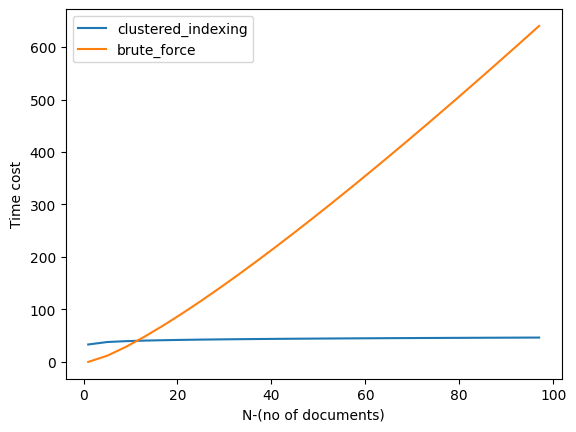

In [83]:
import math
import matplotlib.pyplot as plt

k_ = 2
func  = lambda x:  (math.log(x,k_))* k_ + 10*math.log(10,2)

n = 10**2
ul = 4
x1 = [i for  i in range(1,n,ul)]
y1 = [func(i) for i in range(1,n,ul)]

x2 =  [i for  i in range(1,n,ul)]
y2 = [math.log(i,2)*i for  i in range(1,n,ul)]

# plt.scatter(x1,y1,color = "blue")
plt.plot(x1,y1,label = "clustered_indexing")
 
# plt.scatter(x2,y2,color = "orange")
plt.plot(x2,y2,label = "brute_force")

plt.xlabel("N-(no of documents)")
plt.ylabel("Time cost")

plt.legend()
plt.show()


<h5> bisecting k means clustering

In [49]:
from sklearn.cluster import BisectingKMeans
bkmeans = BisectingKMeans( n_clusters=10,random_state = 42,max_iter = 500,n_init = 20)
bkmeans.fit([i for i in df.vectors])

BisectingKMeans(max_iter=500, n_clusters=10, n_init=20, random_state=42)

In [50]:
df['bkmeans_label'] = bkmeans.labels_

In [51]:
df['bkmeans_label'].value_counts()

1    31
3    30
0    27
4    26
8    21
5    15
7    12
6    10
2     9
9     9
Name: bkmeans_label, dtype: int64

## now check if a query result set has same labels 
study how it varies

In [52]:

def get_top_n_docs(df,query = "be project related docs",n = 7): ## enter the search query
    query_embedding = model.encode(query,normalize_embeddings = True)
    passage_embedding = [i for i in df['vectors']]
    df['dot_score'] = [ 1 - query_embedding.dot(vec_i) for vec_i in passage_embedding]
    return df.sort_values(by = ['dot_score'])[['file_name','dot_score','label','bkmeans_label','file_location']][:n]

In [ ]:
get_top_n_docs(df,query,n = 10)

## dev phase 
    nested k means clustering 

In [30]:
from sklearn.cluster import KMeans

class cluster_node:
    def __init__(self,doc_id_list,centroid,vectors):
        self.doc_id_list = doc_id_list
        self.vector_array = vectors
        self.centroid = centroid
        self.left = None
        self.right = None
 

def nested_k_means_creation( obj,k):
    print(len(obj.doc_id_list))
    if len(obj.doc_id_list) > k:
        kmeans_model = BisectingKMeans( n_clusters= 2,random_state = 42,max_iter = 500,n_init = 20)
        kmeans_model.fit( obj.vector_array)
        labels = kmeans_model.labels_
        lis1 = []
        vector_arr1 = []
        
        lis2 = []
        vector_arr2 = []

        centroid_1 , centroid_2 = kmeans_model.cluster_centers_[0],kmeans_model.cluster_centers_[ 1]

        for ind,cluster in enumerate(labels) :
            if cluster == 0:
                lis1.append(obj.doc_id_list[ind])
                vector_arr1.append(obj.vector_array[ind])
            else:
                lis2.append(obj.doc_id_list[ind])
                vector_arr2.append(obj.vector_array[ind])

        # del obj.doc_id_list
        # del obj.vector_array

        obj.left = nested_k_means_creation( cluster_node(doc_id_list=lis1,vectors=vector_arr1,centroid =  centroid_1),k)
        obj.right = nested_k_means_creation( cluster_node(doc_id_list=lis2,vectors=vector_arr2,centroid =  centroid_2),k )
    return obj

def search(obj,query_vector):
    if obj.left is not None and obj.right is not None:
        cosine_dist1 = 1-query_vector.dot(obj.left.centroid)
        cosine_dist2 = 1-query_vector.dot(obj.right.centroid)
        print(cosine_dist1,cosine_dist2,end = " ")
        if cosine_dist1 < cosine_dist2:
            print("l ")
            return search(obj.left,query_vector)
        else:
            print("r  ")
            return search(obj.right,query_vector)

    score = {}
    for ind,id in enumerate(obj.doc_id_list):
        score[id] = 1- obj.vector_array[ind].dot(query_vector)
    return score


In [31]:
           
ids = [i for i in df.id]
vectors = [i for i in df.vectors]

obj = cluster_node(doc_id_list=ids,vectors=vectors,centroid=0)
nested_k_means_creation(obj,k = 10)   

190
123
90
64
9
55
14
6
8
41
19
9
10
22
7
15
7
8
26
16
10
6
10
33
18
10
8
15
4
11
4
7
67
35
29
4
25
19
11
3
8
8
6
6
32
20
10
10
12
6
6


## cross check nested k means vs brute force dot score function

In [84]:
query = "time table"

In [85]:

query_vector = model.encode(query,normalize_embeddings = True)
id_lis = search(obj,query_vector)
# df[df.id.isin(id_lis)][['id','file_name']]
print()
print('id',"        ",'score',"                       ","file_name")
for i in sorted(id_lis.items(),key = lambda x: x[1]):
    print(i[0],"       ",i[1],"      ",df.loc[i[0],'file_name'])

0.845822885699 0.9727808385577252 l 
0.8208052413933509 0.9140528247144065 l 
0.8411167667499884 0.7708076405154742 r  
0.8318849044961352 0.6730840181464167 r  

id          score                         file_name
90         0.5648270845413208        LP-III dates.pdf
89         0.5893309116363525        LP-III dates (1).pdf
153         0.625930666923523        T.E. 2019 Pattern Endsem Timetable Nov 22_113423 (1).pdf
154         0.6300565898418427        T.E. 2019 Pattern Endsem Timetable Nov 22_113423.pdf
93         0.6332358121871948        LP-IV_Schedule_2022-23 (1).pdf
94         0.6347828507423401        LP-IV_Schedule_2022-23.pdf
12         0.6636490821838379        B.E. 2019 PATTERN INSEM EXAM. TIMETABLE OCT-2022_16092022.pdf
157         0.7643761783838272        TE2019_APR-MAY_2022_13092022.pdf
92         0.7816358804702759        LP-IV_List_2022-23.pdf
169         0.843015193939209        Scan Mar 12, 2021.pdf


In [90]:
get_top_n_docs(df,query,n = 10)

,file_name,dot_score,label,bkmeans_label,file_location
90,LP-III dates.pdf,0.564827,8,3,c:/users/hp/Downloads//LP-III dates.pdf
89,LP-III dates (1).pdf,0.589331,8,3,c:/users/hp/Downloads//LP-III dates (1).pdf
153,T.E. 2019 Pattern Endsem Timetable Nov 22_1134...,0.625931,8,3,c:/users/hp/Downloads//T.E. 2019 Pattern Endse...
154,T.E. 2019 Pattern Endsem Timetable Nov 22_1134...,0.630057,8,3,c:/users/hp/Downloads//T.E. 2019 Pattern Endse...
93,LP-IV_Schedule_2022-23 (1).pdf,0.633236,8,3,c:/users/hp/Downloads//LP-IV_Schedule_2022-23 ...
94,LP-IV_Schedule_2022-23.pdf,0.634783,8,3,c:/users/hp/Downloads//LP-IV_Schedule_2022-23.pdf
12,B.E. 2019 PATTERN INSEM EXAM. TIMETABLE OCT-20...,0.663649,8,3,c:/users/hp/Downloads//B.E. 2019 PATTERN INSEM...
25,be_new_student_counter.pdf.pdf,0.720935,7,1,c:/users/hp/Downloads//be_new_student_counter....
181,Updated_LP-III_Schedule_2022-23.docx,0.733372,8,3,c:/users/hp/Downloads//Updated_LP-III_Schedule...
0,104402558_ExamForm (1).PDF,0.738436,7,1,c:/users/hp/Downloads//104402558_ExamForm (1).PDF


In [89]:
# dics = {}

# def inorder(root):
#     if root != None:
#         if root.left is None and root.right is None:
#             for i in range(len(root.doc_id_list)):
#                 dics[root.doc_id_list[i]] = 1-root.vector_array[i].dot(query_vector)
#         inorder(root.left)
#         inorder(root.right)

# inorder(obj)

# pf = df.copy()[['id','file_name']]
# pf['cosine_dis'] = 0

# for i in dics:
#     pf.loc[i,'cosine_dis'] = dics[i]
# pf.sort_values(by = ['cosine_dis'])[:10]